# Prédiction des ventes à partir des investissements publicitaires  
### Projet d’analyse par régression – Python

L’objectif de ce projet est d’étudier la relation entre les budgets publicitaires alloués aux médias **TV**, **Radio** et **Presse écrite (Newspaper)**, et le niveau des **ventes générées**, à l’aide de modèles de régression.  
Dans un premier temps, une **régression linéaire simple** est utilisée afin d’analyser l’impact de la publicité télévisée sur les ventes, puis une **régression linéaire multiple** est mise en œuvre pour évaluer l’influence combinée de plusieurs canaux publicitaires.


# Imports et configuration

In [ ]:
import pandas as pd #manipulastion de données
import numpy as np #calculs numériques
import matplotlib.pyplot as plt  #visualisation de données
import seaborn as sns #visualisation de données avancée

from sklearn.model_selection import train_test_split #permet de séparer les données
from sklearn.linear_model import LinearRegression #modèle de régression linéaire. 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #évaluation 

# Configuration d'affichage
plt.style.use("default")


## Chargement du dataset


In [ ]:
import pandas as pd

df = pd.read_csv("data/Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Informations générales et statistiques descriptives


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Visualisations : relation budget publicitaire → ventes

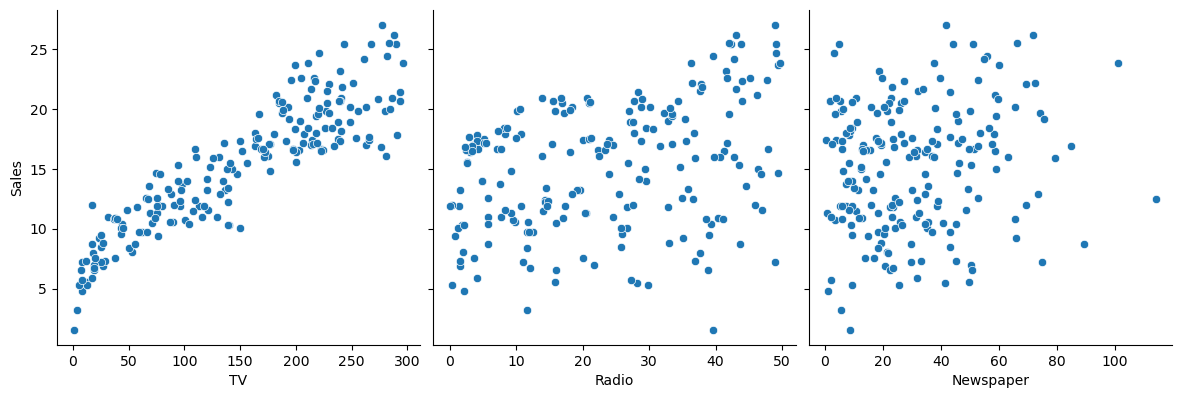

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=4)
plt.show()


Cette section trace des nuages de points (scatter) pour chaque canal publicitaire vs `Sales`.  
Les graphiques aident à visualiser la forme de la relation (linéaire, dispersée, etc.) :

- **TV vs Sales** : on cherche une tendance croissante (plus de budget TV → plus de ventes).  
  *Interprétation attendue* : tendance positive claire ; TV est un bon candidat pour une régression simple.

- **Radio vs Sales** : relation positive mais souvent plus dispersée que TV.  
  *Interprétation* : radio a un effet mais plus variable.

- **Newspaper vs Sales** : nuage de points plus diffus, relation plus faible.  
  *Interprétation* : la presse paraît moins informative pour prédire les ventes ici.
 


## Matrice de corrélation

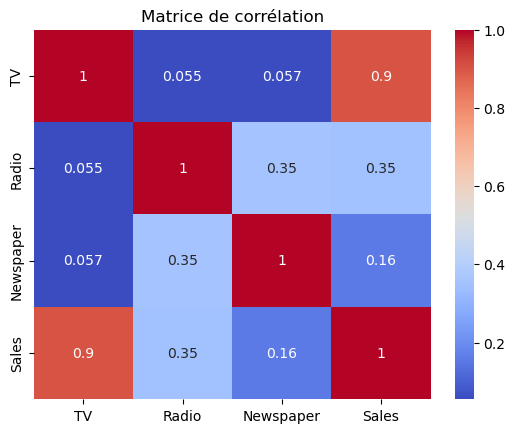

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


## Régression linéaire simple:
### TV → Sales


In [17]:
X = df[['TV']]   # variable explicative
y = df['Sales']  # variable cible

## Séparation en jeux  train / test:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Entraînement du modèle

In [19]:
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


estimer une relation linéaire `Sales = intercept + coef * TV`
- `intercept` : valeur prévue de `Sales` quand `TV = 0` (en k unités).
- `coef` (TV) : variation de `Sales` (en k unités) pour chaque augmentation de 1 k$ en TV.


## Évaluation du modèle simple (TV → Sales)

In [20]:
y_pred_simple = model_simple.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_simple)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_simple))
r2 = r2_score(y_test, y_pred_simple)

print("MAE :", mae)
print("RMSE :", rmse)
print("R² :", r2)


MAE : 1.9502948931650088
RMSE : 2.470035001123256
R² : 0.802561303423698


**MAE (Mean Absolute Error)**,, 
**RMSE (Root Mean Squared Error)** ,

- ## Évaluation du modèle simple (TV → Sales)
- « Le modèle simple (TV → Sales) donne R² = 0.8026, MAE ≈ 1.95 k unités. Cela signifie que 80 % de la variance des ventes est expliquée par le budget TV seul, avec une erreur moyenne d'environ 1 950 unités sur le jeu de test. »


## Visualiser la droite de régression 


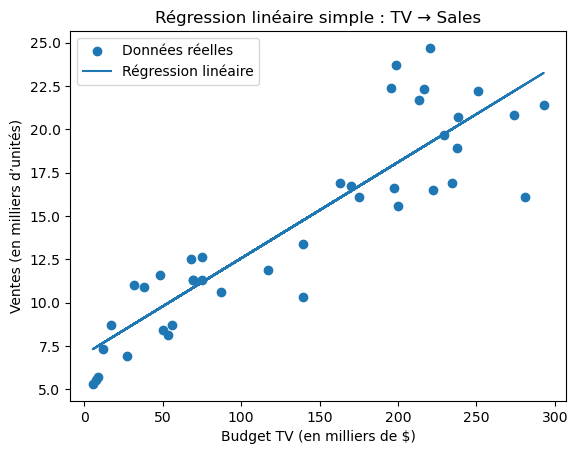

In [21]:
plt.figure()
plt.scatter(X_test, y_test, label="Données réelles")
plt.plot(X_test, y_pred_simple, label="Régression linéaire")
plt.xlabel("Budget TV (en milliers de $)")
plt.ylabel("Ventes (en milliers d’unités)")
plt.title("Régression linéaire simple : TV → Sales")
plt.legend()
plt.show()


## Régression linéaire multiple : TV + Radio + Newspaper → Sales

In [22]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


Étapes :
1. `X = ['TV', 'Radio', 'Newspaper']`, `y = Sales`.  
2. Séparation train/test (80/20, `random_state=42`).  
3. Entraînement d'un `LinearRegression()` sur le jeu d'entraînement.  
4. Calcul des prédictions sur le jeu de test et des métriques (MAE, RMSE, R²).

**But** : mesurer l'effet combiné des trois canaux et observer si la prédiction s'améliore par rapport au modèle simple.


Train / Test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred_multi = model_multiple.predict(X_test)

mae_m = mean_absolute_error(y_test, y_pred_multi)
rmse_m = np.sqrt(mean_squared_error(y_test, y_pred_multi))
r2_m = r2_score(y_test, y_pred_multi)

print("MAE :", mae_m)
print("RMSE :", rmse_m)
print("R² :", r2_m)


MAE : 1.2748262109549344
RMSE : 1.7052146229349232
R² : 0.9059011844150826


Sales=β0​+β1​TV+β2​Radio+β3​Newspaper

In [29]:
coeffs = pd.DataFrame({
    "Canal publicitaire": X.columns,
    "Impact sur les ventes (k unités / k$)": model_multiple.coef_
})

coeffs


,Canal publicitaire,Impact sur les ventes (k unités / k$)
0,TV,0.054509
1,Radio,0.100945
2,Newspaper,0.004337


Ce tableau présente les coefficients d’un modèle de régression linéaire multiple qui mesure l’impact des différents canaux publicitaires sur les ventes.

Chaque coefficient indique l’augmentation attendue des ventes (en milliers d’unités)

**TV (0,0545)**
Une augmentation de 1 k$ du budget TV entraîne une hausse d’environ 0,054 millier d’unités vendues.
La publicité télévisée a donc un impact positif modéré sur les ventes.

**Radio (0,1009)**
Une augmentation de 1 k$ du budget radio permet d’augmenter les ventes d’environ 0,101 millier d’unités.
La radio est le canal le plus influent parmi les trois.

**Newspaper (0,0043)**
Une augmentation de 1 k$ du budget presse écrite génère seulement 0,004 millier d’unités supplémentaires.
L’impact de ce canal est très faible, voire négligeable.

## Conclusion 

Les résultats de la régression linéaire multiple montrent que les budgets publicitaires ont un impact positif sur les ventes, mais avec des niveaux d’efficacité différents selon le canal. La publicité radio apparaît comme le canal le plus influent, générant environ 101 unités supplémentaires pour chaque tranche de 1 000 dollars investie. La télévision a également un effet positif notable, avec environ 55 unités supplémentaires par 1 000 dollars investis. En revanche, la publicité dans les journaux présente un impact très faible sur les ventes, suggérant qu’elle est moins efficace que les autres canaux. Ces résultats indiquent qu’une stratégie publicitaire orientée vers la radio et la télévision serait plus performante pour maximiser les ventes.

coeffs = pd.DataFrame({
    "Canal publicitaire": X.columns,
    "Impact sur les ventes (k unités / k$)": model_multiple.coef_
})

coeffs

